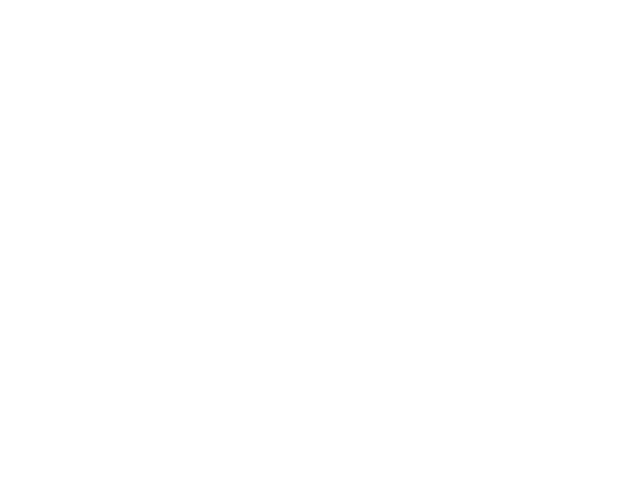

In [92]:
import numpy as np

import matplotlib
%matplotlib widget
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = 'white'
plt.tight_layout()

In [93]:
z = 3 + 4j

assert np.isclose(np.exp(z).real, np.exp(3) * np.cos(4))
assert np.isclose(np.exp(z).imag, np.exp(3) * np.sin(4))

In [94]:

assert np.isclose(np.log(z).real, np.log(5))
assert np.isclose(np.log(z).imag, np.arctan(4/3))

In [95]:

assert np.isclose(np.sin(z).real, np.sin(3) * np.cosh(4))
assert np.isclose(np.sin(z).imag, np.cos(3) * np.sinh(4))

In [96]:

q1 = 5 ** (1/3) * np.exp(1j * (0 * np.pi + np.arctan(4/3)) / 3)
q2 = 5 ** (1/3) * np.exp(1j * (2 * np.pi + np.arctan(4/3)) / 3)
q3 = 5 ** (1/3) * np.exp(1j * (4 * np.pi + np.arctan(4/3)) / 3)

assert np.isclose( q1 ** 3, z)
assert np.isclose( q2 ** 3, z)
assert np.isclose( q3 ** 3, z)

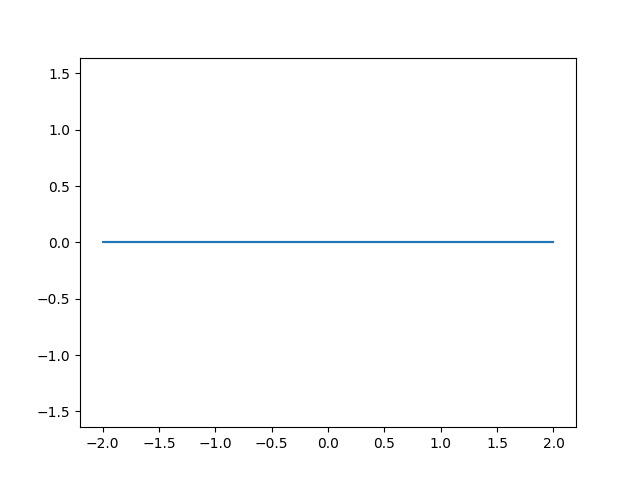

In [97]:
theta = np.linspace(0., 2. * np.pi, 101)
z = np.exp(1.j * theta)
zeta = z + 1. / z
plt.plot(np.real(zeta), np.imag(zeta))
plt.axis('equal')
plt.show()

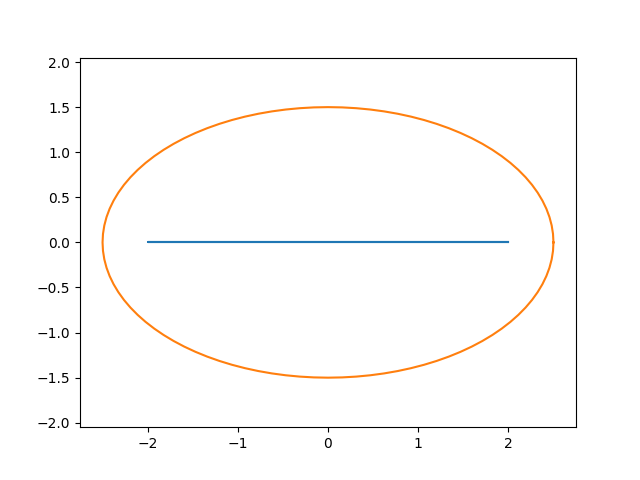

In [98]:
z = 2. * np.exp(1.j * theta)
zeta = z + 1. / z
plt.plot(np.real(zeta), np.imag(zeta))
plt.axis('equal')
plt.show()

C:\Users\louis\AppData\Local\Temp\ipykernel_11136\3859378452.py:2: RuntimeWarning: divide by zero encountered in true_divide
  zeta = z + 1. / z
C:\Users\louis\AppData\Local\Temp\ipykernel_11136\3859378452.py:2: RuntimeWarning: invalid value encountered in true_divide
  zeta = z + 1. / z


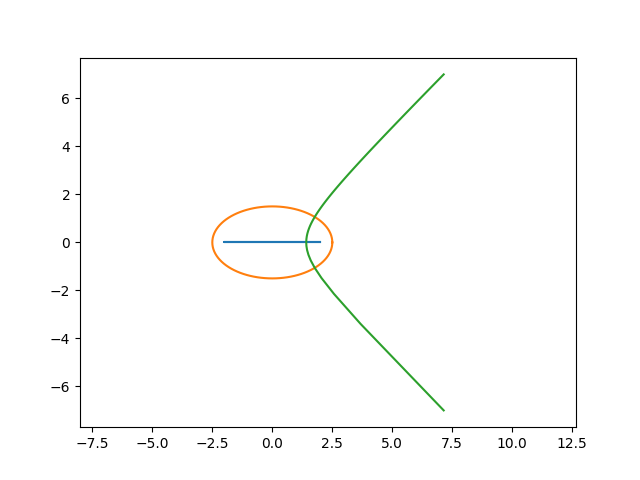

In [99]:
z = np.linspace(0., 10, 101) * np.exp(1.j * np.pi / 4.)
zeta = z + 1. / z
plt.plot(np.real(zeta), np.imag(zeta))
plt.axis('equal')
plt.show()


(11, 26)


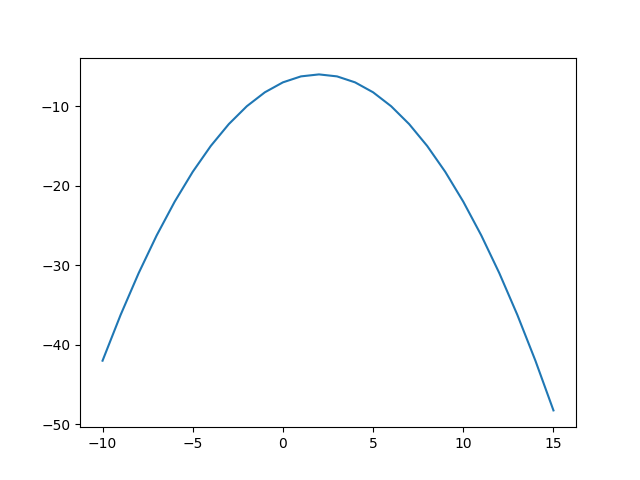

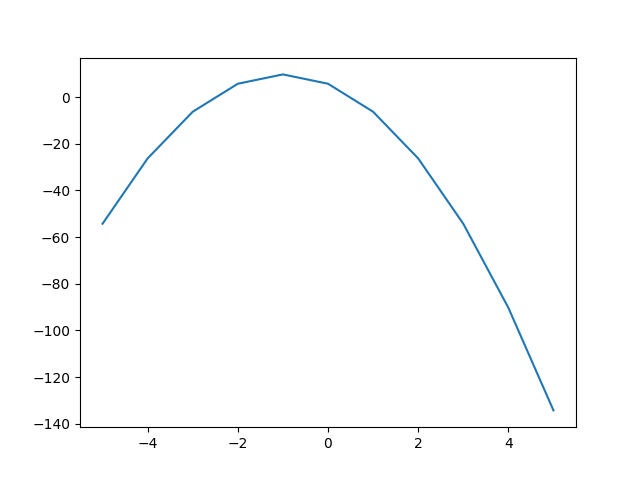

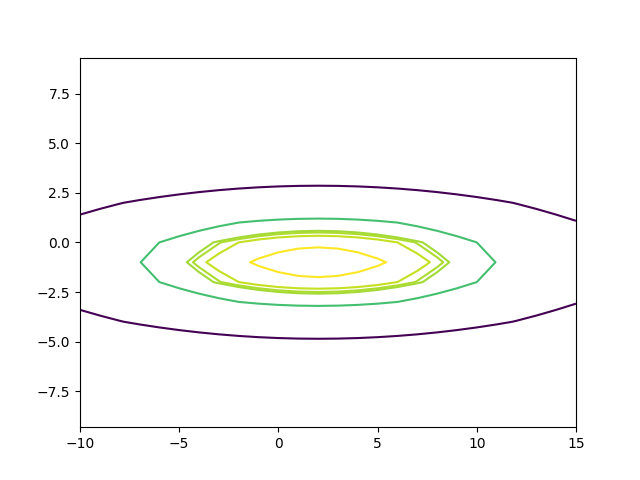

10.0


In [100]:

h0 = 10.; a = 0.25; x0 = 2.; b = 4.; y0 = -1.
x = np.linspace(-10., 15., 26)
y = np.linspace(-5., 5., 11)
xmat,ymat = np.meshgrid(x,y)

h = h0 - a * (xmat - x0)**2 - b * (ymat - y0)**2

print(h.shape)

fig, ax = plt.subplots()
ax.plot(x, h[6, :]); plt.show()
fig, ax = plt.subplots()
ax.plot(y, h[:, 11]); plt.show()

contour_levels = [-50, -10, -1, 0, 2, 7]

fig, ax = plt.subplots()
ax.contour(xmat, ymat, h, contour_levels)
ax.axis('equal')

plt.show()
print(np.max(h))

In [101]:
# find difference in h between two coordinates

x1 = 3; y1 = 0
x2 = 4; y2 = 1

dh1 = h[y2 + y.size // 2, x2 + x.size // 2] - h[y1 + y.size // 2, x1 + x.size // 2]

hgrad = np.gradient(h, y, x)
# gradients at x1, y1
dhdx = hgrad[0][y1 + y.size // 2, x1 + x.size // 2]
dhdy = hgrad[1][y1 + y.size // 2, x1 + x.size // 2]

dh2 = dhdx * (x2 - x1) + dhdy * (y2 - y1)

print(f"Actual difference in h: {dh1}")
print(f"Approximate difference in h: {dh2}")

Actual difference in h: -14.25
Approximate difference in h: -10.0


0.36787944117144233 at (1.0, 0.0)


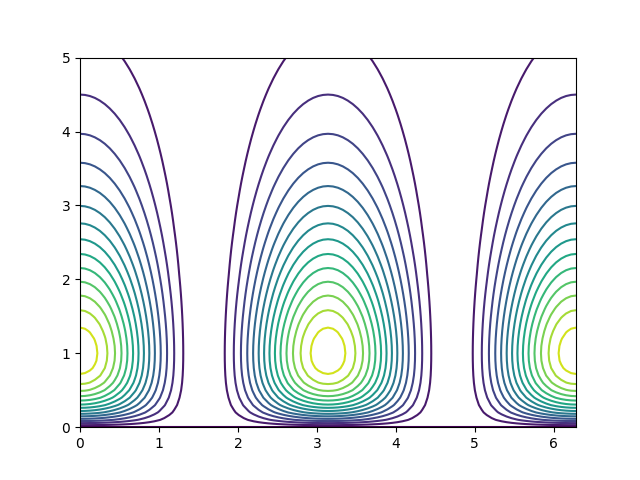

In [102]:

fig,ax = plt.subplots(1, 1)

r = np.linspace(0., 5., 51)
theta = np.linspace(0., 2. * np.pi, 101)
xmat = np.zeros((r.size, theta.size))
ymat = np.zeros((r.size, theta.size))
psi = np.zeros((r.size, theta.size))

theta_mat, r_mat = np.meshgrid(theta, r)
psi = r_mat * np.exp(-r_mat) * np.cos(theta_mat)**2

maxi = np.argmax(psi)
pos = np.unravel_index(maxi, psi.shape)
coords =  r_mat[pos], theta_mat[pos]

print(np.max(psi), "at", coords)

ax.contour(theta_mat, r_mat, psi, 15)
plt.show()

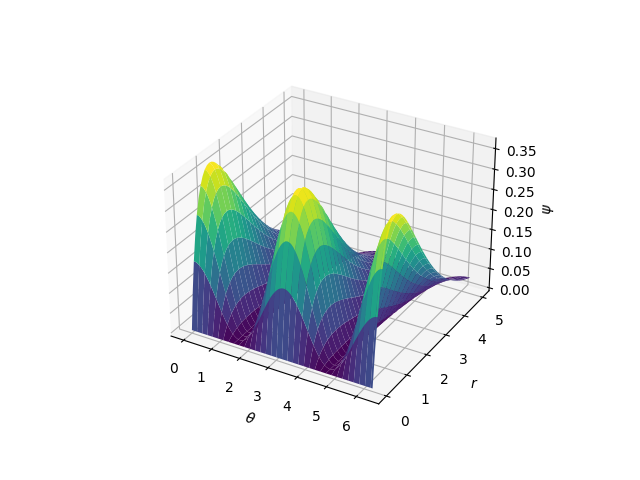

In [103]:
# create out window of 3d plot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# create 3d plot
ax.plot_surface(theta_mat, r_mat, psi, cmap='viridis')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$r$')
ax.set_zlabel(r'$\psi$')
plt.show()


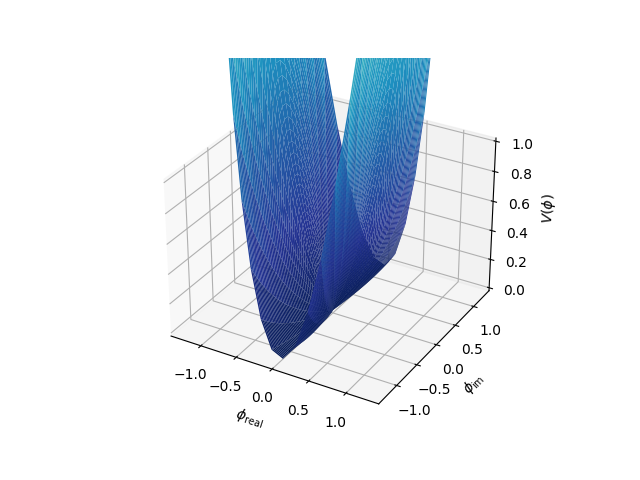

In [104]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1.25, 50)
theta = np.linspace(0, 2*np.pi, 50)
r_mat, theta_mat = np.meshgrid(r, theta)
Z = r_mat * np.exp(r_mat) * np.cos(theta_mat)**2

# Express the mesh in the cartesian system.
X, Y = r_mat*np.cos(theta_mat), r_mat*np.sin(theta_mat)

# Plot the surface.
ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r)

# Tweak the limits and add latex math labels.
ax.set_zlim(0, 1)
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$V(\phi)$')

plt.show()

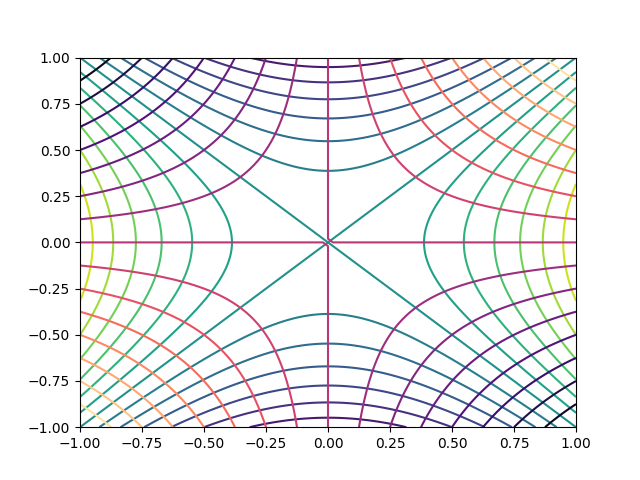

In [105]:

fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(-1., 1., 101)
y = np.linspace(-1., 1., 101)

xmat, ymat = np.meshgrid(x, y)

z = xmat + 1.j * ymat
psi = np.real( z ** 2)
phi = np.imag( z ** 2)

ax.contour(xmat, ymat, psi, 15, cmap = 'viridis')
# alternate heatmap
ax.contour(xmat, ymat, phi, 15, cmap = 'magma')

plt.show()

In [112]:
# find intersection of the two surfaces
closei = np.argwhere(np.isclose(psi, phi, rtol=1e-3))
pos = np.unravel_index(closei, psi.shape)
coords = xmat[pos], ymat[pos]
print(f"positions: {coords}")
## convert coords to angles
theta = np.arctan2(coords[1], coords[0])
print(f"with angles {theta * 180 / np.pi} degrees")


positions: (array([[0., 0.]]), array([[-1., -1.]]))
with angles [[-90. -90.]] theta


so seems to intersect on y axis

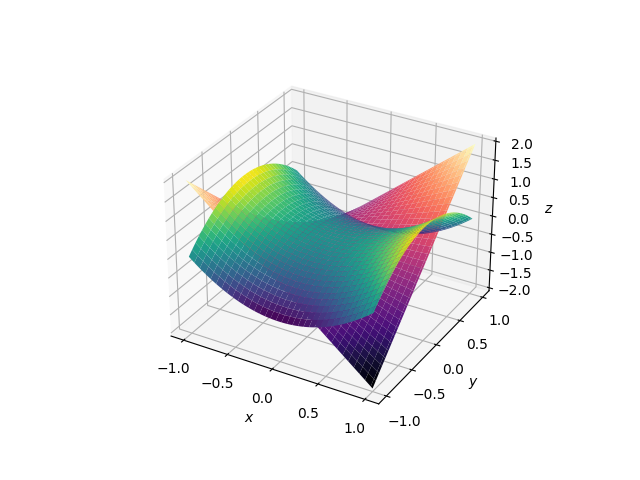

In [107]:
# check visually that this makes sense

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# create 3d plot
ax.plot_surface(xmat, ymat, psi, cmap='viridis')
ax.plot_surface(xmat, ymat, phi, cmap='magma')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')

plt.show()